Test MicronucleiAI method performance
https://www.biorxiv.org/content/10.1101/2024.05.24.595722v1.full.pdf

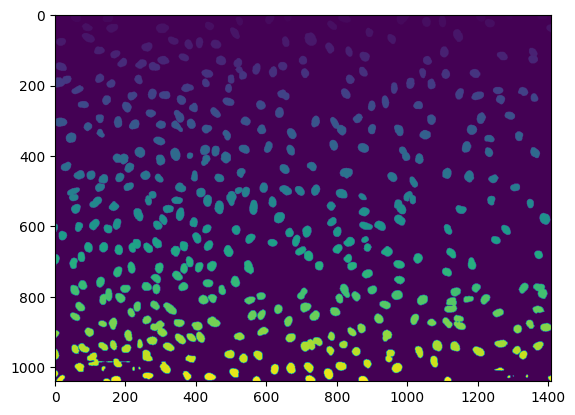

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

im = Image.open("/content/output_image.tif")
plt.imshow(im)
plt.show()

In [ ]:
import numpy as np
import tifffile as tiff

im_array = tiff.imread("/content/Ulises_counts/Day 3 mask/VID3664_A4_1_2024y08m03d_17h27m.tif")
print(im_array.shape, np.unique(im_array))

(1040, 1408) [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93]


# set up

In [ ]:
!cp /content/drive/MyDrive/PMCC/Dataset/Ulises_counts_mask.zip Ulises_counts.zip
!unzip Ulises_counts.zip

cp: cannot stat '/content/drive/MyDrive/PMCC/Dataset/Ulises_counts_mask.zip': No such file or directory
unzip:  cannot find or open Ulises_counts.zip, Ulises_counts.zip.zip or Ulises_counts.zip.ZIP.


In [ ]:
!pip install deepcell

In [ ]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

2024-11-14 17:24:46.030398: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-11-14 17:24:46.030657: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1297544749236658230
 xla_global_id: -1]

In [ ]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!git clone https://github.com/SchapiroLabor/micronuclAI && cd micronuclAI && pip install -r requirements.txt
!cd /content/

Cloning into 'micronuclAI'...
remote: Enumerating objects: 1030, done.
remote: Counting objects: 100% (1015/1015), done.
remote: Compressing objects: 100% (383/383), done.
remote: Total 1030 (delta 704), reused 921 (delta 629), pack-reused 15 (from 1)
Receiving objects: 100% (1030/1030), 43.02 MiB | 24.78 MiB/s, done.
Resolving deltas: 100% (705/705), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 111.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 100.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 111.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.3/802.3 kB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 119.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 102.9 MB/s eta 0:00:00
   

In [ ]:
import copy
import os
import sys

import imageio
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

from deepcell.applications import NuclearSegmentation, CellTracking
from deepcell.datasets import DynamicNuclearNetSample

In [ ]:
from PIL import Image
import os

# Specify the input and output directories
input_dir = "/content/Ulises_counts/Day 6 count"
output_dir = "/content/Ulises_counts/Day 6 tif"
os.makedirs(output_dir, exist_ok=True)  # Create the output directory if it doesn't exist

# Loop through all files in the input directory
for filename in os.listdir(input_dir):
    if filename[:2] == '._':
      continue
    if filename.endswith(".jpg"):
        # Open the JPEG image
        img_path = os.path.join(input_dir, filename)
        img = Image.open(img_path)
        gray_img = img.convert("L")

        # Convert to TIFF and save in the output directory
        output_path = os.path.join(output_dir, filename.replace(".jpg", ".tif"))
        gray_img.save(output_path, format="TIFF")

In [ ]:
from PIL import Image

d3 = []
for file in os.listdir('Ulises_counts/Day 3 count'):
  if file[:2] == '._':
    continue
  im = Image.open('Ulises_counts/Day 3 count/'+file)

  # Convert to grayscale
  im = im.convert("L")

  d3.append(np.array(im))
d6 = []
for file in os.listdir('Ulises_counts/Day 6 count'):
  if file[:2] == '._':
    continue
  im = Image.open('Ulises_counts/Day 6 count/'+file)

  # Convert to grayscale
  im = im.convert("L")

  d6.append(np.array(im))
d3 = np.stack(d3)
d6 = np.stack(d6)
d3 = np.expand_dims(d3, axis=-1)
d6 = np.expand_dims(d6, axis=-1)

# generate masks by Mesmer

In [ ]:
def shuffle_colors(ymax, cmap):
    """Utility function to generate a colormap for a labeled image"""
    cmap = mpl.colormaps[cmap].resampled(ymax)
    nmap = cmap(range(ymax))
    np.random.shuffle(nmap)
    cmap = ListedColormap(nmap)
    cmap.set_bad('black')
    return cmap

os.environ.update({"DEEPCELL_ACCESS_TOKEN": "prw4v1Bj.hZCkhjlAGs0seuHsjJ1plqF86Bkei0dG"})
app = NuclearSegmentation.from_version("1.1")

429MB [00:39, 11.3MB/s]


In [ ]:
y_pred = app.predict(d3, image_mpp=0.625)

In [ ]:
y_pred6 = app.predict(d6, image_mpp=0.625)

In [ ]:
import tifffile as tiff

%cd /content/
!mkdir "Ulises_counts/Day 3 mask"
!mkdir "Ulises_counts/Day 6 mask"

def save_mask(img, masks, path):
  # go through img name
  i = 0
  for j in range(masks.shape[0]):
    mask = masks[j]

    img_name = img[i]
    while img_name[:2] == '._':
      i += 1
      if i >= len(img):
        return
      img_name = img[i]

    tiff.imwrite(path+img_name[:-4]+".tif", mask.squeeze().astype(np.uint16))
    print(path+img_name[:-4]+".tif")
    i += 1

d3_img = os.listdir('Ulises_counts/Day 3 count')
d6_img = os.listdir('Ulises_counts/Day 6 count')

save_mask(d3_img, y_pred, "Ulises_counts/Day 3 mask/")
save_mask(d6_img, y_pred6, "Ulises_counts/Day 6 mask/")

/content
mkdir: cannot create directory ‘Ulises_counts/Day 3 mask’: File exists
mkdir: cannot create directory ‘Ulises_counts/Day 6 mask’: File exists
Ulises_counts/Day 3 mask/VID3664_E6_1_2024y08m03d_17h27m.tif
Ulises_counts/Day 3 mask/VID3664_D4_4_2024y08m03d_17h27m.tif
Ulises_counts/Day 3 mask/VID3664_B5_3_2024y08m03d_17h27m.tif
Ulises_counts/Day 3 mask/VID3664_D5_1_2024y08m03d_17h27m.tif
Ulises_counts/Day 3 mask/VID3664_E6_3_2024y08m03d_17h27m.tif
Ulises_counts/Day 3 mask/VID3664_A4_3_2024y08m03d_17h27m.tif
Ulises_counts/Day 3 mask/VID3664_D4_3_2024y08m03d_17h27m.tif
Ulises_counts/Day 3 mask/VID3664_B5_2_2024y08m03d_17h27m.tif
Ulises_counts/Day 3 mask/VID3664_B6_3_2024y08m03d_17h27m.tif
Ulises_counts/Day 3 mask/VID3664_C4_4_2024y08m03d_17h27m.tif
Ulises_counts/Day 3 mask/VID3664_A5_1_2024y08m03d_17h27m.tif
Ulises_counts/Day 3 mask/VID3664_A6_2_2024y08m03d_17h27m.tif
Ulises_counts/Day 3 mask/VID3664_E4_1_2024y08m03d_17h27m.tif
Ulises_counts/Day 3 mask/VID3664_B6_2_2024y08m03d_17h27m

In [ ]:
len(os.listdir('Ulises_counts/Day 6 mask'))

60

In [ ]:
!zip -r Ulises_counts_all.zip /content/Ulises_counts
!cp Ulises_counts_all.zip /content/drive/MyDrive/PMCC/Dataset

  adding: content/Ulises_counts/ (stored 0%)
  adding: content/Ulises_counts/Day 6 tif/ (stored 0%)
  adding: content/Ulises_counts/Day 6 tif/VID3664_E6_3_2024y08m06d_11h44m.tif (deflated 62%)
  adding: content/Ulises_counts/Day 6 tif/VID3664_B6_2_2024y08m06d_11h44m.tif (deflated 87%)
  adding: content/Ulises_counts/Day 6 tif/VID3664_A5_2_2024y08m06d_11h44m.tif (deflated 91%)
  adding: content/Ulises_counts/Day 6 tif/VID3664_A4_3_2024y08m06d_11h44m.tif (deflated 90%)
  adding: content/Ulises_counts/Day 6 tif/VID3664_E6_4_2024y08m06d_11h44m.tif (deflated 70%)
  adding: content/Ulises_counts/Day 6 tif/VID3664_B5_4_2024y08m06d_11h44m.tif (deflated 87%)
  adding: content/Ulises_counts/Day 6 tif/VID3664_A6_4_2024y08m06d_11h44m.tif (deflated 94%)
  adding: content/Ulises_counts/Day 6 tif/VID3664_C5_1_2024y08m06d_11h44m.tif (deflated 73%)
  adding: content/Ulises_counts/Day 6 tif/VID3664_E4_3_2024y08m06d_11h44m.tif (deflated 63%)
  adding: content/Ulises_counts/Day 6 tif/VID3664_C5_4_2024y08m

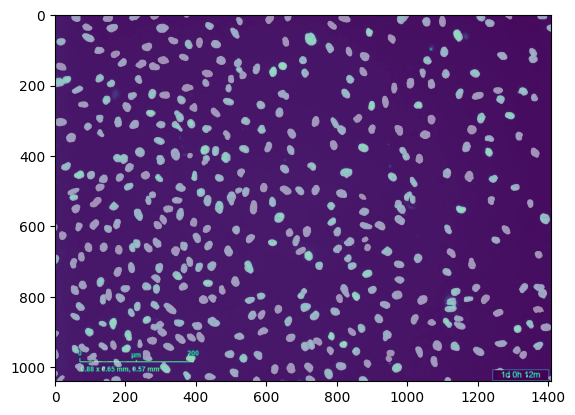

In [ ]:
plt.imshow(d3[0])
blank_im = np.zeros((d3[0].shape[0],d3[0].shape[1],4))
mask = y_pred[0].squeeze()
blank_im[mask>0] = np.array([255,255,255,0.5])
plt.imshow(blank_im)

# predict

In [ ]:
!mkdir /content/output
%cd /content/micronuclAI

/content/micronuclAI


In [ ]:
from tqdm import tqdm
import os

for file in tqdm(os.listdir('/content/Ulises_counts/Day 3 mask')):
  !python "src/model/prediction2.py" -i "../Ulises_counts/Day 3 tif/{file[:-4]+".tif"}" -m "../Ulises_counts/Day 3 mask/{file}" -mod "./micronuclAI_model/micronuclai.pt" -o "/content/output"

for file in tqdm(os.listdir('/content/Ulises_counts/Day 6 mask')):
  !python "src/model/prediction2.py" -i "../Ulises_counts/Day 6 tif/{file[:-4]+".tif"}" -m "../Ulises_counts/Day 6 mask/{file}" -mod "./micronuclAI_model/micronuclai.pt" -o "/content/output"

  0%|          | 0/60 [00:00<?, ?it/s]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_D5_3_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_D5_3_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:15:50.919853: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:15:50.919890: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

  2%|▏         | 1/60 [00:20<20:01, 20.36s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_C5_4_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_C5_4_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:16:11.142886: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:16:11.142920: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

  3%|▎         | 2/60 [00:33<15:45, 16.30s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_C4_2_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_C4_2_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:16:24.661917: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:16:24.661952: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

  5%|▌         | 3/60 [00:53<16:46, 17.66s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_B6_3_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_B6_3_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:16:43.883911: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:16:43.883947: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

  7%|▋         | 4/60 [01:07<15:07, 16.20s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_C4_4_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_C4_4_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:16:57.969349: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:16:57.969385: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

  8%|▊         | 5/60 [01:19<13:44, 14.99s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_E4_3_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_E4_3_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:17:10.924638: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:17:10.924678: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 10%|█         | 6/60 [01:49<18:01, 20.03s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_B5_2_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_B5_2_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:17:40.558582: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:17:40.558620: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 12%|█▏        | 7/60 [02:05<16:27, 18.64s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_A6_2_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_A6_2_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:17:56.274687: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:17:56.274722: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 13%|█▎        | 8/60 [02:15<13:52, 16.01s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_E6_1_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_E6_1_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:18:06.783267: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:18:06.783302: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 15%|█▌        | 9/60 [02:38<15:24, 18.13s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_D4_2_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_D4_2_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:18:29.672602: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:18:29.672639: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 17%|█▋        | 10/60 [03:03<16:43, 20.06s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_D4_1_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_D4_1_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:18:54.004086: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:18:54.004125: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 18%|█▊        | 11/60 [03:24<16:38, 20.37s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_D5_2_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_D5_2_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:19:15.109212: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:19:15.109252: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 20%|██        | 12/60 [03:44<16:19, 20.40s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_A5_3_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_A5_3_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:19:35.162808: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:19:35.162840: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 22%|██▏       | 13/60 [03:54<13:35, 17.36s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_C5_3_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_C5_3_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:19:45.635349: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:19:45.635383: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 23%|██▎       | 14/60 [04:11<13:03, 17.03s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_C6_2_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_C6_2_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:20:02.138186: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:20:02.138220: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 25%|██▌       | 15/60 [04:28<12:43, 16.97s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_B5_1_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_B5_1_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:20:18.924800: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:20:18.924833: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 27%|██▋       | 16/60 [04:46<12:42, 17.33s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_E6_2_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_E6_2_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:20:36.992037: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:20:36.992069: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 28%|██▊       | 17/60 [05:00<11:48, 16.47s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_D5_1_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_D5_1_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:20:51.554879: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:20:51.554912: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 30%|███       | 18/60 [05:22<12:40, 18.10s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_B4_4_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_B4_4_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:21:13.272032: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:21:13.272075: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 32%|███▏      | 19/60 [05:33<10:47, 15.80s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_E5_3_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_E5_3_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:21:23.982675: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:21:23.982710: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 33%|███▎      | 20/60 [06:06<14:03, 21.09s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_A4_1_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_A4_1_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:21:57.183520: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:21:57.183554: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 35%|███▌      | 21/60 [06:18<12:00, 18.47s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_D6_1_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_D6_1_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:22:09.772553: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:22:09.772586: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 37%|███▋      | 22/60 [06:40<12:15, 19.35s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_E5_2_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_E5_2_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:22:30.862368: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:22:30.862405: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 38%|███▊      | 23/60 [06:54<11:01, 17.88s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_E5_4_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_E5_4_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:22:45.567026: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:22:45.567062: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 40%|████      | 24/60 [07:18<11:52, 19.80s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_B4_3_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_B4_3_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:23:09.907805: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:23:09.907836: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 42%|████▏     | 25/60 [07:32<10:26, 17.89s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_B4_2_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_B4_2_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:23:23.003244: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:23:23.003281: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 43%|████▎     | 26/60 [07:43<08:55, 15.75s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_A4_4_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_A4_4_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:23:33.720912: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:23:33.720946: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 45%|████▌     | 27/60 [07:52<07:37, 13.85s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_B4_1_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_B4_1_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:23:43.207243: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:23:43.207284: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 47%|████▋     | 28/60 [08:05<07:16, 13.64s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_C4_1_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_C4_1_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:23:56.445472: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:23:56.445514: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 48%|████▊     | 29/60 [08:22<07:29, 14.51s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_E6_3_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_E6_3_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:24:13.293844: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:24:13.293883: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 50%|█████     | 30/60 [08:56<10:14, 20.49s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_B6_2_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_B6_2_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:24:47.340340: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:24:47.340381: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 52%|█████▏    | 31/60 [09:08<08:35, 17.77s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_C6_3_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_C6_3_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:24:58.853773: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:24:58.853806: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 53%|█████▎    | 32/60 [09:24<08:05, 17.35s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_C6_1_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_C6_1_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:25:15.278633: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:25:15.278668: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 55%|█████▌    | 33/60 [09:44<08:08, 18.11s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_E4_2_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_E4_2_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:25:35.162684: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:25:35.162719: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 57%|█████▋    | 34/60 [10:00<07:35, 17.53s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_A5_4_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_A5_4_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:25:51.218250: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:25:51.218287: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 58%|█████▊    | 35/60 [10:10<06:21, 15.25s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_D6_2_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_D6_2_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:26:01.366409: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:26:01.366445: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 60%|██████    | 36/60 [10:29<06:34, 16.46s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_B6_1_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_B6_1_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:26:20.514724: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:26:20.514780: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 62%|██████▏   | 37/60 [10:44<06:09, 16.07s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_E4_1_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_E4_1_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:26:35.705366: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:26:35.705403: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 63%|██████▎   | 38/60 [10:59<05:42, 15.59s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_D6_3_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_D6_3_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:26:50.314423: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:26:50.314463: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 65%|██████▌   | 39/60 [11:23<06:21, 18.17s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_D6_4_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_D6_4_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:27:14.506550: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:27:14.506590: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 67%|██████▋   | 40/60 [11:41<06:02, 18.11s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_A5_2_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_A5_2_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:27:32.289149: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:27:32.289185: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 68%|██████▊   | 41/60 [11:54<05:15, 16.62s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_B5_3_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_B5_3_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:27:45.477332: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:27:45.477375: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 70%|███████   | 42/60 [12:09<04:49, 16.06s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_A4_3_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_A4_3_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:28:00.102702: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:28:00.102738: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 72%|███████▏  | 43/60 [12:20<04:09, 14.68s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_D4_4_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_D4_4_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:28:11.767461: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:28:11.767504: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 73%|███████▎  | 44/60 [12:40<04:20, 16.30s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_A6_1_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_A6_1_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:28:31.847594: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:28:31.847630: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 75%|███████▌  | 45/60 [12:59<04:15, 17.01s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_C6_4_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_C6_4_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:28:50.426862: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:28:50.426897: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 77%|███████▋  | 46/60 [13:11<03:38, 15.61s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_E6_4_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_E6_4_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:29:02.870402: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:29:02.870441: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 78%|███████▊  | 47/60 [13:32<03:43, 17.22s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_C4_3_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_C4_3_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:29:23.836173: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:29:23.836208: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 80%|████████  | 48/60 [13:47<03:18, 16.54s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_E4_4_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_E4_4_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:29:38.870074: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:29:38.870110: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 82%|████████▏ | 49/60 [14:15<03:38, 19.86s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_B5_4_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_B5_4_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:30:06.292652: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:30:06.292689: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 83%|████████▎ | 50/60 [14:28<02:57, 17.79s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_E5_1_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_E5_1_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:30:19.350502: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:30:19.350539: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 85%|████████▌ | 51/60 [14:42<02:30, 16.73s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_D5_4_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_D5_4_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:30:33.583641: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:30:33.583678: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 87%|████████▋ | 52/60 [15:00<02:15, 16.92s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_A6_3_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_A6_3_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:30:50.838561: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:30:50.838596: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 88%|████████▊ | 53/60 [15:10<01:44, 14.98s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_B6_4_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_B6_4_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:31:01.348063: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:31:01.348104: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 90%|█████████ | 54/60 [15:21<01:23, 13.92s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_C5_1_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_C5_1_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:31:12.884443: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:31:12.884481: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 92%|█████████▏| 55/60 [15:38<01:13, 14.62s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_D4_3_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_D4_3_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:31:29.212519: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:31:29.212560: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 93%|█████████▎| 56/60 [16:00<01:08, 17.02s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_C5_2_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_C5_2_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:31:51.642300: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:31:51.642337: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 95%|█████████▌| 57/60 [16:15<00:48, 16.31s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_A5_1_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_A5_1_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:32:06.093041: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:32:06.093076: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 97%|█████████▋| 58/60 [16:26<00:29, 14.82s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_A6_4_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_A6_4_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:32:17.427593: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:32:17.427627: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 98%|█████████▊| 59/60 [16:37<00:13, 13.47s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 3 tif/VID3664_A4_2_2024y08m03d_17h27m.tif
Loading mask from  = /content/Ulises_counts/Day 3 mask/VID3664_A4_2_2024y08m03d_17h27m.tif
Batch size         = 32
Predicting.
2024-11-08 07:32:27.800928: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:32:27.800972: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

  0%|          | 0/60 [00:00<?, ?it/s]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_D5_3_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_D5_3_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:32:38.598260: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:32:38.598297: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

  2%|▏         | 1/60 [00:26<25:51, 26.30s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_B4_4_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_B4_4_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:33:04.655806: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:33:04.655839: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

  3%|▎         | 2/60 [00:37<16:48, 17.38s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_E6_3_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_E6_3_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:33:16.254480: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:33:16.254520: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

  5%|▌         | 3/60 [01:15<25:31, 26.86s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_D6_4_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_D6_4_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:33:54.162813: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:33:54.162847: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

  7%|▋         | 4/60 [01:38<23:27, 25.14s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_C6_4_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_C6_4_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:34:16.504712: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:34:16.504770: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

  8%|▊         | 5/60 [01:52<19:26, 21.22s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_D6_1_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_D6_1_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:34:30.929502: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:34:30.929535: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 10%|█         | 6/60 [02:19<20:46, 23.08s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_D6_2_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_D6_2_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:34:57.613760: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:34:57.613800: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 12%|█▏        | 7/60 [02:44<20:59, 23.77s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_B5_4_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_B5_4_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:35:22.761169: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:35:22.761203: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 13%|█▎        | 8/60 [02:57<17:45, 20.49s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_D6_3_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_D6_3_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:35:36.381369: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:35:36.381409: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 15%|█▌        | 9/60 [03:25<19:18, 22.71s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_B6_3_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_B6_3_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:36:03.757149: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:36:03.757185: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 17%|█▋        | 10/60 [03:42<17:34, 21.09s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_B6_4_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_B6_4_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:36:21.076930: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:36:21.076964: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 18%|█▊        | 11/60 [03:54<14:59, 18.36s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_E6_4_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_E6_4_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:36:33.644646: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:36:33.644682: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 20%|██        | 12/60 [04:23<17:06, 21.38s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_C6_2_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_C6_2_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:37:01.806463: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:37:01.806504: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 22%|██▏       | 13/60 [04:48<17:39, 22.54s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_D5_2_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_D5_2_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:37:27.148645: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:37:27.148684: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 23%|██▎       | 14/60 [05:14<18:07, 23.65s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_A4_4_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_A4_4_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:37:52.928798: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:37:52.928836: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 25%|██▌       | 15/60 [05:24<14:36, 19.49s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_B5_3_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_B5_3_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:38:02.969570: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:38:02.969605: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 27%|██▋       | 16/60 [05:43<14:17, 19.48s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_E4_2_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_E4_2_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:38:22.489081: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:38:22.489119: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 28%|██▊       | 17/60 [06:08<15:05, 21.05s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_A6_1_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_A6_1_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:38:47.203394: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:38:47.203430: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 30%|███       | 18/60 [06:30<14:59, 21.42s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_E5_2_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_E5_2_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:39:09.313321: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:39:09.313358: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 32%|███▏      | 19/60 [06:48<13:54, 20.35s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_C4_2_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_C4_2_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:39:27.332271: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:39:27.332308: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 33%|███▎      | 20/60 [07:10<13:52, 20.81s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_B6_2_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_B6_2_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:39:49.000565: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:39:49.000599: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 35%|███▌      | 21/60 [07:24<12:14, 18.84s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_E5_3_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_E5_3_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:40:03.600290: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:40:03.600323: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 37%|███▋      | 22/60 [08:04<15:48, 24.97s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_A6_3_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_A6_3_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:40:42.532627: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:40:42.532669: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 38%|███▊      | 23/60 [08:14<12:35, 20.43s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_D5_4_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_D5_4_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:40:52.567882: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:40:52.567918: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 40%|████      | 24/60 [08:39<13:04, 21.80s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_E4_1_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_E4_1_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:41:17.491899: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:41:17.491934: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 42%|████▏     | 25/60 [08:58<12:21, 21.19s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_C5_1_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_C5_1_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:41:37.377145: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:41:37.377185: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 43%|████▎     | 26/60 [09:20<12:01, 21.22s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_E6_2_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_E6_2_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:41:58.512022: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:41:58.512057: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 45%|████▌     | 27/60 [09:36<10:55, 19.85s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_E4_4_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_E4_4_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:42:15.449855: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:42:15.449888: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 47%|████▋     | 28/60 [10:11<12:56, 24.26s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_A4_1_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_A4_1_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:42:49.772759: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:42:49.772792: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 48%|████▊     | 29/60 [10:26<11:12, 21.68s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_B4_3_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_B4_3_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:43:05.357889: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:43:05.357923: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 50%|█████     | 30/60 [10:43<10:07, 20.27s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_C5_2_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_C5_2_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:43:22.396237: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:43:22.396271: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 52%|█████▏    | 31/60 [11:05<09:59, 20.66s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_B5_2_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_B5_2_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:43:43.845628: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:43:43.845664: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 53%|█████▎    | 32/60 [11:19<08:45, 18.77s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_B4_1_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_B4_1_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:43:58.245067: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:43:58.245102: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 55%|█████▌    | 33/60 [11:36<08:06, 18.02s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_A6_2_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_A6_2_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:44:14.517065: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:44:14.517098: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 57%|█████▋    | 34/60 [11:46<06:46, 15.62s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_C5_3_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_C5_3_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:44:24.808113: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:44:24.808148: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 58%|█████▊    | 35/60 [12:09<07:31, 18.08s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_D4_4_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_D4_4_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:44:48.530166: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:44:48.530200: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 60%|██████    | 36/60 [12:36<08:15, 20.63s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_D4_2_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_D4_2_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:45:15.218702: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:45:15.218738: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 62%|██████▏   | 37/60 [13:04<08:44, 22.82s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_B5_1_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_B5_1_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:45:43.001042: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:45:43.001078: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 63%|██████▎   | 38/60 [13:26<08:17, 22.60s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_D4_1_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_D4_1_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:46:05.198111: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:46:05.198146: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 65%|██████▌   | 39/60 [13:56<08:39, 24.73s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_C4_4_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_C4_4_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:46:34.683565: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:46:34.683605: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 67%|██████▋   | 40/60 [14:13<07:26, 22.34s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_E6_1_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_E6_1_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:46:51.727296: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:46:51.727331: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 68%|██████▊   | 41/60 [14:43<07:50, 24.76s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_A4_3_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_A4_3_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:47:21.794686: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:47:21.794720: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 70%|███████   | 42/60 [14:54<06:12, 20.68s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_D5_1_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_D5_1_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:47:33.193633: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:47:33.193669: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 72%|███████▏  | 43/60 [15:20<06:16, 22.16s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_C5_4_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_C5_4_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:47:58.606677: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:47:58.606716: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 73%|███████▎  | 44/60 [15:35<05:21, 20.09s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_D4_3_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_D4_3_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:48:14.168669: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:48:14.168709: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 75%|███████▌  | 45/60 [16:02<05:34, 22.28s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_B6_1_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_B6_1_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:48:41.420892: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:48:41.420932: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 77%|███████▋  | 46/60 [16:22<05:00, 21.50s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_C4_1_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_C4_1_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:49:01.041541: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:49:01.041576: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 78%|███████▊  | 47/60 [16:45<04:43, 21.79s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_A4_2_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_A4_2_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:49:23.386205: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:49:23.386239: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 80%|████████  | 48/60 [16:55<03:42, 18.54s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_A5_1_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_A5_1_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:49:34.320880: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:49:34.320913: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 82%|████████▏ | 49/60 [17:10<03:09, 17.26s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_E4_3_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_E4_3_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:49:48.941288: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:49:48.941321: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 83%|████████▎ | 50/60 [17:43<03:41, 22.20s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_A5_2_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_A5_2_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:50:22.338552: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:50:22.338586: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 85%|████████▌ | 51/60 [17:54<02:48, 18.73s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_C6_1_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_C6_1_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:50:33.172978: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:50:33.173017: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 87%|████████▋ | 52/60 [18:19<02:45, 20.64s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_A5_3_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_A5_3_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:50:57.968137: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:50:57.968177: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 88%|████████▊ | 53/60 [18:30<02:03, 17.67s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_A6_4_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_A6_4_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:51:08.657473: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:51:08.657509: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 90%|█████████ | 54/60 [18:40<01:31, 15.26s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_A5_4_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_A5_4_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:51:18.375915: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:51:18.375949: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 92%|█████████▏| 55/60 [18:51<01:10, 14.11s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_B4_2_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_B4_2_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:51:29.807141: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:51:29.807177: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 93%|█████████▎| 56/60 [19:03<00:53, 13.49s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_C4_3_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_C4_3_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:51:42.045187: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:51:42.045222: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 95%|█████████▌| 57/60 [19:23<00:45, 15.30s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_C6_3_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_C6_3_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:52:01.563160: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:52:01.563195: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 97%|█████████▋| 58/60 [19:48<00:36, 18.27s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_E5_1_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_E5_1_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:52:26.782657: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:52:26.782691: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

 98%|█████████▊| 59/60 [20:10<00:19, 19.59s/it]

Loading model     = ./micronuclAI_model/micronuclai.pt
Using device      = cpu
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Loading image from = /content/Ulises_counts/Day 6 tif/VID3664_E5_4_2024y08m06d_11h44m.tif
Loading mask from  = /content/Ulises_counts/Day 6 mask/VID3664_E5_4_2024y08m06d_11h44m.tif
Batch size         = 32
Predicting.
2024-11-08 07:52:49.683183: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2024-11-08 07:52:49.683217: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not 

100%|██████████| 60/60 [20:42<00:00, 20.71s/it]


In [ ]:
!zip -r mnAI_output.zip /content/output
!cp mnAI_output.zip /content/drive/MyDrive/PMCC/Analysis/

  adding: content/output/ (stored 0%)
  adding: content/output/VID3664_B4_3_2024y08m03d_17h27m_summary.csv (deflated 50%)
  adding: content/output/VID3664_E5_1_2024y08m03d_17h27m_predictions.csv (deflated 58%)
  adding: content/output/VID3664_C5_3_2024y08m06d_11h44m_predictions.csv (deflated 58%)
  adding: content/output/VID3664_C6_3_2024y08m06d_11h44m_predictions.csv (deflated 58%)
  adding: content/output/VID3664_A6_2_2024y08m03d_17h27m_predictions.csv (deflated 53%)
  adding: content/output/VID3664_E6_1_2024y08m06d_11h44m_summary.csv (deflated 48%)
  adding: content/output/VID3664_C4_3_2024y08m03d_17h27m_summary.csv (deflated 51%)
  adding: content/output/VID3664_A6_4_2024y08m06d_11h44m_summary.csv (deflated 55%)
  adding: content/output/VID3664_D5_2_2024y08m06d_11h44m_summary.csv (deflated 43%)
  adding: content/output/VID3664_D4_4_2024y08m06d_11h44m_predictions.csv (deflated 58%)
  adding: content/output/VID3664_A5_1_2024y08m03d_17h27m_summary.csv (deflated 43%)
  adding: content/

# load output

In [ ]:
%cd /content
!cp /content/drive/MyDrive/PMCC/Dataset/Ulises_counts_all.zip Ulises_counts.zip
!unzip Ulises_counts.zip

/content
cp: cannot stat '/content/drive/MyDrive/PMCC/Dataset/Ulises_counts_all.zip': No such file or directory
unzip:  cannot find or open Ulises_counts.zip, Ulises_counts.zip.zip or Ulises_counts.zip.ZIP.


In [ ]:
!cp /content/drive/MyDrive/PMCC/Analysis/mnAI_output.zip /content/
!unzip mnAI_output.zip

Archive:  mnAI_output.zip
   creating: content/output/
  inflating: content/output/VID3664_B4_3_2024y08m03d_17h27m_summary.csv  
  inflating: content/output/VID3664_E5_1_2024y08m03d_17h27m_predictions.csv  
  inflating: content/output/VID3664_C5_3_2024y08m06d_11h44m_predictions.csv  
  inflating: content/output/VID3664_C6_3_2024y08m06d_11h44m_predictions.csv  
  inflating: content/output/VID3664_A6_2_2024y08m03d_17h27m_predictions.csv  
  inflating: content/output/VID3664_E6_1_2024y08m06d_11h44m_summary.csv  
  inflating: content/output/VID3664_C4_3_2024y08m03d_17h27m_summary.csv  
  inflating: content/output/VID3664_A6_4_2024y08m06d_11h44m_summary.csv  
  inflating: content/output/VID3664_D5_2_2024y08m06d_11h44m_summary.csv  
  inflating: content/output/VID3664_D4_4_2024y08m06d_11h44m_predictions.csv  
  inflating: content/output/VID3664_A5_1_2024y08m03d_17h27m_summary.csv  
  inflating: content/output/VID3664_A6_3_2024y08m06d_11h44m_summary.csv  
  inflating: content/output/VID3664_D

In [ ]:
import pandas as pd
import os

d3_pred = []
d6_pred = []
for file in os.listdir('/content/Ulises_counts/Day 3 count'):
  filename = file[:-4]
  if filename[:2] == '._':
    continue

  df = pd.read_csv(f'/content/output/{filename+"_summary"}.csv')
  d3_pred.append(df[df['micronuclei'] == 'total_micronuclei']['count'].values[0])

for file in sorted(os.listdir('/content/Ulises_counts/Day 6 count')):
  filename = file[:-4]
  if filename[:2] == '._':
    continue

  df = pd.read_csv(f'/content/output/{filename+"_summary"}.csv')
  d6_pred.append(df['count'][df['micronuclei'] == 'total_micronuclei'].values[0])

In [ ]:
csv_path = "/content/Ulises_counts/ulises_output_0.7.csv"

df = pd.read_csv(csv_path)

df['3 days pred (mnAI)'] = d3_pred
df['6 days pred (mnAI)'] = d6_pred

df.to_csv('mn_count_all.csv', index=False)
df

,Image,3 days count,6 days count,Identifier,3 days pred (0.7 score),6 days pred (0.7 score),3 days pred (mnAI),6 days pred (mnAI)
0,1,5,22,A4_1,3,22,13.0,49.0
1,2,7,7,A4_2,7,11,32.0,10.0
2,3,5,4,A4_3,4,4,8.0,13.0
3,4,0,0,A4_4,0,1,30.0,3.0
4,5,14,19,A5_1,15,29,21.0,40.0
5,6,1,3,A5_2,1,5,14.0,7.0
6,7,1,1,A5_3,0,2,13.0,5.0
7,8,0,0,A5_4,0,0,14.0,0.0
8,9,17,24,A6_1,23,17,22.0,35.0
9,10,1,3,A6_2,1,5,18.0,5.0


The regression slope is [[0.89068815]], intercept is [0.32206582]
[[1.         0.82835547]
 [0.82835547 1.        ]]


<ipython-input-39-2a9c96c71952>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X1, Y1,cmap='blue',label="day3")
<ipython-input-39-2a9c96c71952>:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X2, Y2,cmap='yellow',label="day6")


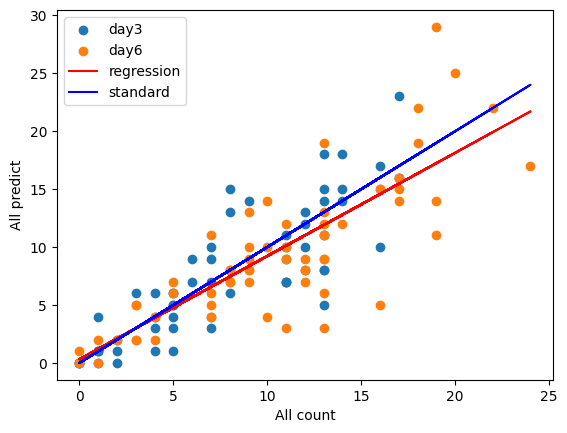

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X = np.concatenate((df.iloc[:, 1].values.reshape(-1, 1),df.iloc[:, 2].values.reshape(-1, 1)))  # iloc[:, 1] is the column of X
Y = np.concatenate((df.iloc[:, 4].values.reshape(-1, 1),df.iloc[:, 5].values.reshape(-1, 1)))

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
print(f"The regression slope is {linear_regressor.coef_}, intercept is {linear_regressor.intercept_}")
r = np.corrcoef(X.reshape(-1), Y.reshape(-1))
print(r)

X1 = df.iloc[:, 1].values.reshape(-1, 1)  # iloc[:, 1] is the column of X
Y1 = df.iloc[:, 4].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
X2 = df.iloc[:, 2].values.reshape(-1, 1)  # iloc[:, 1] is the column of X
Y2 = df.iloc[:, 5].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y

plt.scatter(X1, Y1,cmap='blue',label="day3")
plt.scatter(X2, Y2,cmap='yellow',label="day6")
plt.plot(X, Y_pred, color='red', label="regression")
plt.plot(X, X, color='blue', label="standard")
plt.xlabel("All count")
plt.ylabel("All predict")
plt.legend()
plt.show()

The regression slope is [[1.23714019]], intercept is [11.67440592]
[[1.         0.46025219]
 [0.46025219 1.        ]]


<ipython-input-40-e8702a303e7d>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X1, Y1,cmap='blue',label="day3")
<ipython-input-40-e8702a303e7d>:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X2, Y2,cmap='yellow',label="day6")


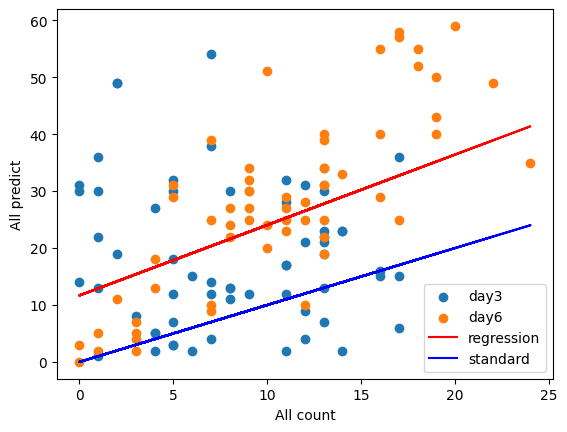

In [ ]:
X = np.concatenate((df.iloc[:, 1].values.reshape(-1, 1),df.iloc[:, 2].values.reshape(-1, 1)))  # iloc[:, 1] is the column of X
Y = np.concatenate((df.iloc[:, 6].values.reshape(-1, 1),df.iloc[:, 7].values.reshape(-1, 1)))

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
print(f"The regression slope is {linear_regressor.coef_}, intercept is {linear_regressor.intercept_}")
r = np.corrcoef(X.reshape(-1), Y.reshape(-1))
print(r)

X1 = df.iloc[:, 1].values.reshape(-1, 1)  # iloc[:, 1] is the column of X
Y1 = df.iloc[:, 6].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
X2 = df.iloc[:, 2].values.reshape(-1, 1)  # iloc[:, 1] is the column of X
Y2 = df.iloc[:, 7].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y

plt.scatter(X1, Y1,cmap='blue',label="day3")
plt.scatter(X2, Y2,cmap='yellow',label="day6")
plt.plot(X, Y_pred, color='red', label="regression")
plt.plot(X, X, color='blue', label="standard")
plt.xlabel("All count")
plt.ylabel("All predict")
plt.legend()
plt.show()

# new

In [ ]:
!git clone https://github.com/kew6688/MicroNuclei_Detection.git
!pip install -e MicroNuclei_Detection/.

!pip show mn_segmentation

%cd /content/MicroNuclei_Detection

Cloning into 'MicroNuclei_Detection'...
remote: Enumerating objects: 517, done.
remote: Counting objects: 100% (209/209), done.
remote: Compressing objects: 100% (154/154), done.
remote: Total 517 (delta 123), reused 132 (delta 52), pack-reused 308 (from 1)
Receiving objects: 100% (517/517), 28.45 MiB | 21.24 MiB/s, done.
Resolving deltas: 100% (290/290), done.
Obtaining file:///content/MicroNuclei_Detection
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for mn_segmentation (pyproject.toml) ... done
  Created wheel for mn_segmentation: filename=mn_segmentation-0.1.0-py2.py3-none-any.whl size=5157 sha256=bddb864c91a4f6d593dde1f11a91748bc083d6b53bb049b4c5cb367ed5eee16f
  Stored in directory: /tmp/pip-ephem-wheel-cache-md16qhxq/wheels/44/d3/d1/353d79dc8f5f434b1d33808323c1d5bb1d136026d7ae0912b8
Successfully buil

In [ ]:
!mkdir /content/checkpoints/
!cp /content/drive/MyDrive/PMCC/checkpoints/maskrcnn-resnet50-jitter-v2-60-40.pt /content/checkpoints/

In [ ]:
!cp /content/drive/MyDrive/PMCC/Analysis/Ulises_counts_all.zip Ulises_counts.zip
!unzip Ulises_counts.zip

Archive:  Ulises_counts.zip
   creating: content/Ulises_counts/
   creating: content/Ulises_counts/Day 6 tif/
  inflating: content/Ulises_counts/Day 6 tif/VID3664_E6_3_2024y08m06d_11h44m.tif  
  inflating: content/Ulises_counts/Day 6 tif/VID3664_B6_2_2024y08m06d_11h44m.tif  
  inflating: content/Ulises_counts/Day 6 tif/VID3664_A5_2_2024y08m06d_11h44m.tif  
  inflating: content/Ulises_counts/Day 6 tif/VID3664_A4_3_2024y08m06d_11h44m.tif  
  inflating: content/Ulises_counts/Day 6 tif/VID3664_E6_4_2024y08m06d_11h44m.tif  
  inflating: content/Ulises_counts/Day 6 tif/VID3664_B5_4_2024y08m06d_11h44m.tif  
  inflating: content/Ulises_counts/Day 6 tif/VID3664_A6_4_2024y08m06d_11h44m.tif  
  inflating: content/Ulises_counts/Day 6 tif/VID3664_C5_1_2024y08m06d_11h44m.tif  
  inflating: content/Ulises_counts/Day 6 tif/VID3664_E4_3_2024y08m06d_11h44m.tif  
  inflating: content/Ulises_counts/Day 6 tif/VID3664_C5_4_2024y08m06d_11h44m.tif  
  inflating: content/Ulises_counts/Day 6 tif/VID3664_D4_2_20

In [ ]:
!git clone https://huggingface.co/kew1046/MaskRCNN-resnet50FPN

Cloning into 'MaskRCNN-resnet50FPN'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 3 (from 1)
Unpacking objects: 100% (9/9), 3.10 KiB | 1.55 MiB/s, done.


In [ ]:
from mn_segmentation.lib.Application import Application
checkpoint_path = "MaskRCNN-resnet50FPN/maskrcnn-resnet50fpn.pt"
app = Application(checkpoint_path)

In [ ]:
import torch
from mn_segmentation.lib.Application import Application
from mn_segmentation.models.mask_rcnn import maskrcnn_mobile, maskrcnn_resnet, maskrcnn_resnet50_fpn
import os
import time

# model = maskrcnn_resnet50_fpn(weights=None)
# model.load_state_dict(torch.load("/content/checkpoints/maskrcnn-resnet50-jitter-v2-60-40.pt"))

# # model = maskrcnn_resnet("resnext101_32x8d", num_classes=2, pretrained=True)
# app = Application(model=model, device=torch.device('cuda'))

pred = [[],[]]

folders = ["/content/Ulises_counts/Day 3 count", "/content/Ulises_counts/Day 6 count"]
for i in range(2):
  folder = folders[i]
  image_paths = sorted(os.listdir(folder))

  for image_path in image_paths:
     if image_path[:2] == "._": continue
     start = time.time()
     cnt = app.predict_image_count(os.path.join(folder,image_path),True,0.7,True)
     print(f"{image_path} {time.time()-start}")
     pred[i].append(cnt)

VID3664_A4_1_2024y08m03d_17h27m.jpg 5.664236068725586
VID3664_A4_2_2024y08m03d_17h27m.jpg 3.3905529975891113
VID3664_A4_3_2024y08m03d_17h27m.jpg 3.364971876144409
VID3664_A4_4_2024y08m03d_17h27m.jpg 3.3292291164398193
VID3664_A5_1_2024y08m03d_17h27m.jpg 3.4193978309631348
VID3664_A5_2_2024y08m03d_17h27m.jpg 3.3702023029327393
VID3664_A5_3_2024y08m03d_17h27m.jpg 3.4462010860443115
VID3664_A5_4_2024y08m03d_17h27m.jpg 3.435276985168457
VID3664_A6_1_2024y08m03d_17h27m.jpg 3.6126723289489746
VID3664_A6_2_2024y08m03d_17h27m.jpg 3.4618115425109863
VID3664_A6_3_2024y08m03d_17h27m.jpg 3.545281410217285
VID3664_A6_4_2024y08m03d_17h27m.jpg 3.4989662170410156
VID3664_B4_1_2024y08m03d_17h27m.jpg 3.5679497718811035
VID3664_B4_2_2024y08m03d_17h27m.jpg 3.5870420932769775
VID3664_B4_3_2024y08m03d_17h27m.jpg 3.648527145385742
VID3664_B4_4_2024y08m03d_17h27m.jpg 3.601118326187134
VID3664_B5_1_2024y08m03d_17h27m.jpg 3.733917236328125
VID3664_B5_2_2024y08m03d_17h27m.jpg 3.7209091186523438
VID3664_B5_3_2024

In [ ]:
!pip install fvcore

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61396 sha256=e7ac502ea25cf0f0c1f9b9982bf148c828279c839946fcd84de4e066359e326b
  Stored in directory: /root/.cache/pip/wheels/01/c0/af/77c1cf53a1be9e42a52b48e5af2169d40ec2e89f7362489dd0
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31528 sha256=554c8983656f3fd8bd38ca4b4384f29a947ecf12af1a60351753ce653ef1073f
  Stored in directory: /root/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e476cfd48ed0df92b91080c1d
Successfully built fvcore iopath


In [ ]:
from fvcore.nn import FlopCountAnalysis
import torchvision
from PIL import Image
import torch
import torchvision.transforms as T
from mn_segmentation.models.mask_rcnn import maskrcnn_mobile, maskrcnn_resnet, maskrcnn_resnet50_fpn

model = maskrcnn_resnet("resnext101_32x8d", num_classes=2, pretrained=True)
model.eval()
img_path = "/content/Ulises_counts/Day 3 count/VID3664_A4_1_2024y08m03d_17h27m.jpg"
img = Image.open(img_path)
transform = T.Compose([T.ToTensor()])
img = transform(img)
# pred = model([img])
flops = FlopCountAnalysis(model, [img])
flops.total()

Using maskrcnn with resnext101_32x8d backbone...


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'backbone_name' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt101_32X8D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt101_32X8D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnext101_32x8d-8ba56ff5.pth" to /root/.cache/torch/hub/c

442558712704

In [ ]:
import pandas as pd

csv_path = "/content/Ulises_counts/mn_count_all.csv"
df = pd.read_csv(csv_path)

df['3 days pred (new, 0.7)'] = pred[0]
df['6 days pred (new, 0.7)'] = pred[1]

df.to_csv('mn_count_all.csv', index=False)

In [ ]:
df

,Image,3 days count,6 days count,Identifier,3 days pred (0.7 score),6 days pred (0.7 score),3 days pred (mnAI),6 days pred (mnAI),"3 days pred (new, 0.7)","6 days pred (new, 0.7)","3 days pred (new, 0.8)","6 days pred (new, 0.8)"
0,1,5,22,A4_1,3,22,13.0,49.0,3,25,3,20
1,2,7,7,A4_2,7,11,32.0,10.0,9,9,9,7
2,3,5,4,A4_3,4,4,8.0,13.0,4,5,3,5
3,4,0,0,A4_4,0,1,30.0,3.0,0,1,0,1
4,5,14,19,A5_1,15,29,21.0,40.0,13,33,11,31
5,6,1,3,A5_2,1,5,14.0,7.0,1,5,1,5
6,7,1,1,A5_3,0,2,13.0,5.0,2,3,2,3
7,8,0,0,A5_4,0,0,14.0,0.0,0,0,0,0
8,9,17,24,A6_1,23,17,22.0,35.0,25,17,21,14
9,10,1,3,A6_2,1,5,18.0,5.0,1,7,1,7


The regression slope is [[1.02033101]], intercept is [1.00157168]
[[1.         0.80196319]
 [0.80196319 1.        ]]


<ipython-input-17-01136655dceb>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X1, Y1,cmap='blue',label="day3")
<ipython-input-17-01136655dceb>:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X2, Y2,cmap='yellow',label="day6")


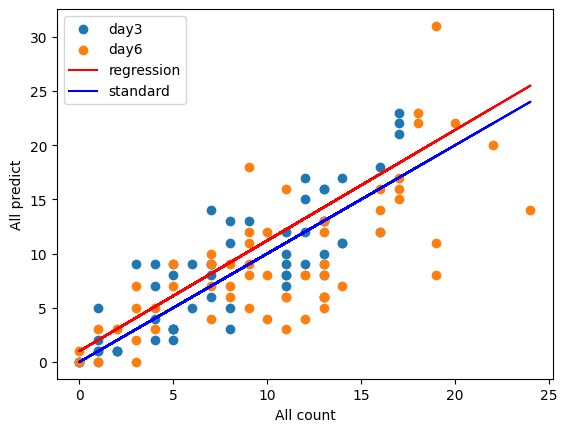

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X = np.concatenate((df.iloc[:, 1].values.reshape(-1, 1),df.iloc[:, 2].values.reshape(-1, 1)))  # iloc[:, 1] is the column of X
Y = np.concatenate((df.iloc[:, 8].values.reshape(-1, 1),df.iloc[:, 9].values.reshape(-1, 1)))

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
print(f"The regression slope is {linear_regressor.coef_}, intercept is {linear_regressor.intercept_}")
r = np.corrcoef(X.reshape(-1), Y.reshape(-1))
print(r)

X1 = df.iloc[:, 1].values.reshape(-1, 1)  # iloc[:, 1] is the column of X
Y1 = df.iloc[:, 10].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
X2 = df.iloc[:, 2].values.reshape(-1, 1)  # iloc[:, 1] is the column of X
Y2 = df.iloc[:, 11].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y

plt.scatter(X1, Y1,cmap='blue',label="day3")
plt.scatter(X2, Y2,cmap='yellow',label="day6")
plt.plot(X, Y_pred, color='red', label="regression")
plt.plot(X, X, color='blue', label="standard")
plt.xlabel("All count")
plt.ylabel("All predict")
plt.legend()
plt.show()

In [ ]:
import pandas as pd

csv_path = "/content/content/Ulises_counts/mn_count_all.csv"

df = pd.read_csv(csv_path)

df

,Image,3 days count,6 days count,Identifier,3 days pred (0.7 score),6 days pred (0.7 score),3 days pred (mnAI),6 days pred (mnAI)
0,1,5,22,A4_1,3.0,25.0,13.0,49.0
1,2,7,7,A4_2,9.0,9.0,32.0,10.0
2,3,5,4,A4_3,4.0,5.0,8.0,13.0
3,4,0,0,A4_4,0.0,1.0,30.0,3.0
4,5,14,19,A5_1,13.0,33.0,21.0,40.0
5,6,1,3,A5_2,1.0,5.0,14.0,7.0
6,7,1,1,A5_3,2.0,3.0,13.0,5.0
7,8,0,0,A5_4,0.0,0.0,14.0,0.0
8,9,17,24,A6_1,25.0,17.0,22.0,35.0
9,10,1,3,A6_2,1.0,7.0,18.0,5.0


The regression slope is 1.0203310147636973, intercept is 1.0015716786260977, r_value is 0.8019631850965372, p_value is 3.5971425160978028e-28, std_err is 0.06996672978897353
The regression slope is [[1.02033101]], intercept is [1.00157168]
[[1.         0.80196319]
 [0.80196319 1.        ]]
The regression slope is 1.496398427404942, intercept is 9.25034137043046, r_value is 0.5567038090601552, p_value is 4.044205068510881e-11, std_err is 0.20555689100659785
The regression slope is [[1.49639843]], intercept is [9.25034137]
[[1.         0.55670381]
 [0.55670381 1.        ]]


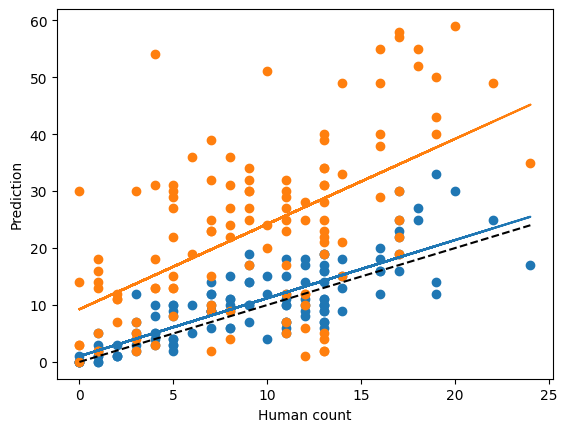

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = np.concatenate((df.iloc[:, 1].values.reshape(-1, 1),df.iloc[:, 2].values.reshape(-1, 1)))  # iloc[:, 1] is the column of X
Y = np.concatenate((df.iloc[:, 4].values.reshape(-1, 1),df.iloc[:, 5].values.reshape(-1, 1)))
# Reshape X and Y to 1D arrays
Xs = X.reshape(-1)
Ys = Y.reshape(-1)

res = stats.linregress(Xs,Ys)
print(f"The regression slope is {res.slope}, intercept is {res.intercept}, r_value is {res.rvalue}, p_value is {res.pvalue}, std_err is {res.stderr}")

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
print(f"The regression slope is {linear_regressor.coef_}, intercept is {linear_regressor.intercept_}")
r = np.corrcoef(X.reshape(-1), Y.reshape(-1))
print(r)

plt.scatter(X, Y,label="Model counts")
plt.plot(X, Y_pred,  label="Model regression")
base = np.linspace(0, max(X), 10)
plt.plot(base, base, color='black', label="baseline", linestyle="--")

X = np.concatenate((df.iloc[:, 1].values.reshape(-1, 1),df.iloc[:, 2].values.reshape(-1, 1)))  # iloc[:, 1] is the column of X
Y1 = np.concatenate((df.iloc[:, 6].values.reshape(-1, 1),df.iloc[:, 7].values.reshape(-1, 1)))

# Reshape X and Y to 1D arrays
Xs = X.reshape(-1)
Ys = Y1.reshape(-1)

res = stats.linregress(Xs,Ys)
print(f"The regression slope is {res.slope}, intercept is {res.intercept}, r_value is {res.rvalue}, p_value is {res.pvalue}, std_err is {res.stderr}")

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y1)
Y_pred = linear_regressor.predict(X)
print(f"The regression slope is {linear_regressor.coef_}, intercept is {linear_regressor.intercept_}")
r = np.corrcoef(X.reshape(-1), Y1.reshape(-1))
print(r)

plt.scatter(X, Y1,label="mnAI counts")
plt.plot(X, Y_pred,  label="mnAI regression")
plt.xlabel("Human count")
plt.ylabel("Prediction")
# plt.legend()
plt.title("")
plt.show()

In [ ]:
rng = np.random.default_rng()
x = rng.random(10)
y = 1.6*x + rng.random(10)
res = stats.linregress(x, y)